In [1]:
!pip install investpy

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import investpy as inv
import matplotlib
import plotly.graph_objects as go
matplotlib.rcParams['figure.figsize'] = (16,8)

In [3]:
bondsBr = inv.get_bonds_list('brazil')
bondsBr

['Brazil 3M',
 'Brazil 6M',
 'Brazil 9M',
 'Brazil 1Y',
 'Brazil 2Y',
 'Brazil 3Y',
 'Brazil 5Y',
 'Brazil 8Y',
 'Brazil 10Y']

In [4]:
bonds_overview = inv.get_bonds_overview('brazil')
bonds_overview

country        name   last  last_close   high    low  change  \
0  brazil   Brazil 3M  2.790       2.805  2.805  2.794  -0.015   
1  brazil   Brazil 6M  2.528       2.540  2.540  2.535  -0.013   
2  brazil   Brazil 9M  2.665       2.665  2.670  2.665   0.000   
3  brazil   Brazil 1Y  2.850       2.865  2.880  2.865  -0.015   
4  brazil   Brazil 2Y  3.828       3.820  3.830  3.820  +0.007   
5  brazil   Brazil 3Y  5.223       5.305  5.305  5.255  -0.082   
6  brazil   Brazil 5Y  6.282       6.300  6.380  6.300  -0.018   
7  brazil   Brazil 8Y  7.200       7.200  7.260  7.200   0.000   
8  brazil  Brazil 10Y  7.682       7.700  7.760  7.690  -0.018   

  change_percentage  
0            -0.53%  
1            -0.49%  
2             0.00%  
3            -0.52%  
4            +0.20%  
5            -1.55%  
6            -0.29%  
7             0.00%  
8            -0.23%

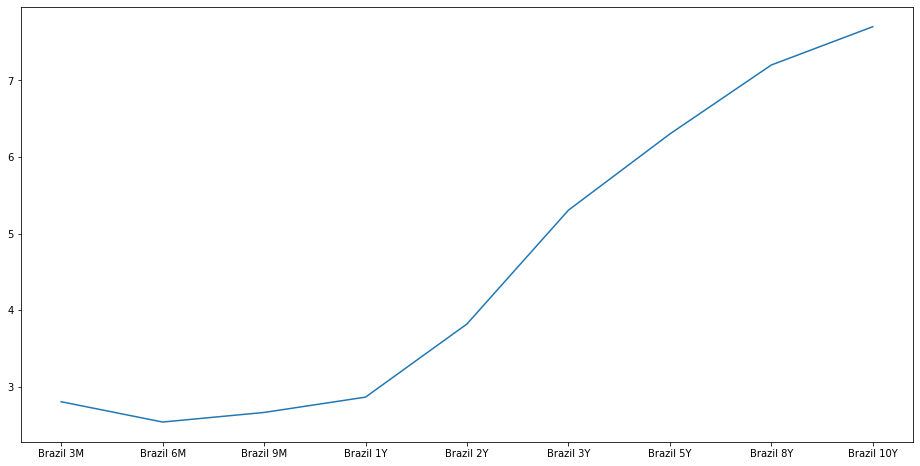

In [5]:
plt.plot(bondsBr, bonds_overview['last_close'])

## Valor negociado da taxa de juros dia a dia

In [6]:
data_inicio = '01/01/2010'
data_fim = '28/04/2020'
um_ano = inv.get_bond_historical_data('Brazil 1Y', from_date=data_inicio, to_date=data_fim)
um_ano

Open    High     Low   Close
Date                                      
2010-01-04  11.040  11.416  11.010  11.360
2010-01-05  11.370  11.400  11.310  11.320
2010-01-06  11.350  11.350  11.270  11.295
2010-01-07  11.275  11.416  11.270  11.416
2010-01-08  11.285  11.416  11.205  11.205
...            ...     ...     ...     ...
2020-04-22   2.975   2.975   2.775   2.815
2020-04-23   2.815   2.995   2.815   2.985
2020-04-24   2.990   3.585   2.990   3.585
2020-04-27   3.585   3.745   3.585   3.745
2020-04-28   3.750   3.750   3.225   3.225

[2688 rows x 4 columns]

## Variação do fechamento da taxa de juros

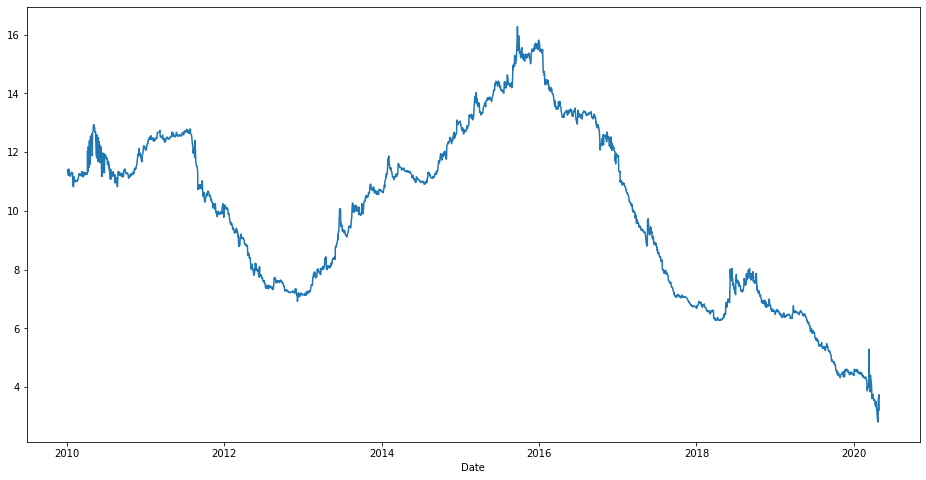

In [7]:
um_ano['Close'].plot()

## Todas as taxas para todos os periodos

In [8]:
data_inicio = '01/01/2010'
data_fim = '28/04/2020'

bonds = pd.DataFrame()

for prazo in bondsBr:
    bonds[prazo] = inv.get_bond_historical_data(prazo, from_date=data_inicio, to_date=data_fim)['Close']

# convertendo o index para date time para facilitar a busca
bonds.index = pd.to_datetime(bonds.index) 

bonds

Brazil 3M  Brazil 6M  Brazil 9M  Brazil 1Y  Brazil 2Y  Brazil 3Y  \
Date                                                                           
2010-01-04      8.680      9.170     10.475     11.360     11.910     12.700   
2010-01-05      8.670      9.170     10.445     11.320     11.890     12.740   
2010-01-06      8.670      9.140     10.330     11.295     11.820     12.750   
2010-01-07      8.700      9.140     10.330     11.416     11.264     12.770   
2010-01-08      8.650      9.110     10.300     11.205     11.770     12.760   
...               ...        ...        ...        ...        ...        ...   
2020-04-22      3.070      2.775      2.715      2.815      3.530      4.815   
2020-04-23      3.085      2.835      2.855      2.985      3.775      5.130   
2020-04-24      3.290      3.170      3.345      3.585        NaN        NaN   
2020-04-27      3.325      3.265      3.495      3.745      4.725      6.425   
2020-04-28      3.160      2.950      2.990      3.225      4.045      5.490   

            Brazil 5Y  Brazil 8Y  Brazil 10Y  
Date                                          
2010-01-04     12.740        NaN         NaN  
2010-01-05     12.740        NaN         NaN  
2010-01-06     12.740        NaN         NaN  
2010-01-07     12.770        NaN         NaN  
2010-01-08     12.760        NaN         NaN  
...               ...        ...         ...  
2020-04-22      5.780      6.600       6.925  
2020-04-23      6.095      6.890       7.190  
2020-04-24      6.180      6.990       7.275  
2020-04-27      7.375      8.225       8.490  
2020-04-28      6.480      7.345       7.720  

[1212 rows x 9 columns]

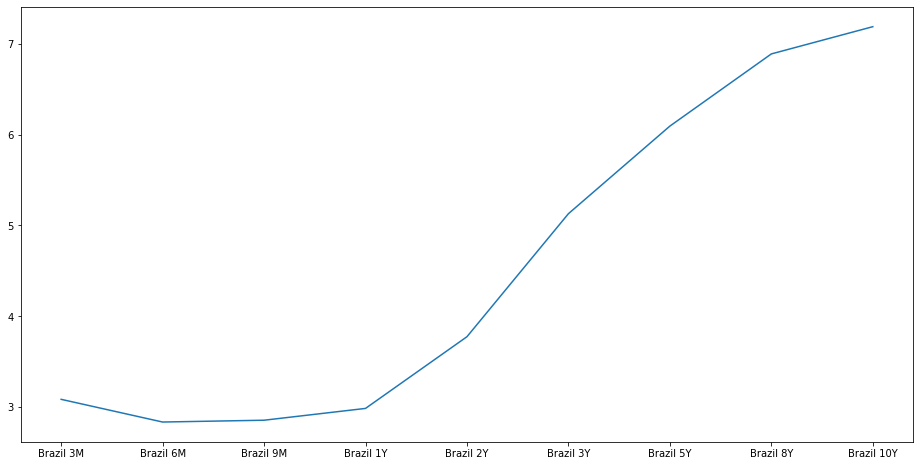

In [9]:
plt.plot(bondsBr, bonds.loc['2020-04-23'])

## Curva de juros para cada dia ao longo do tempo

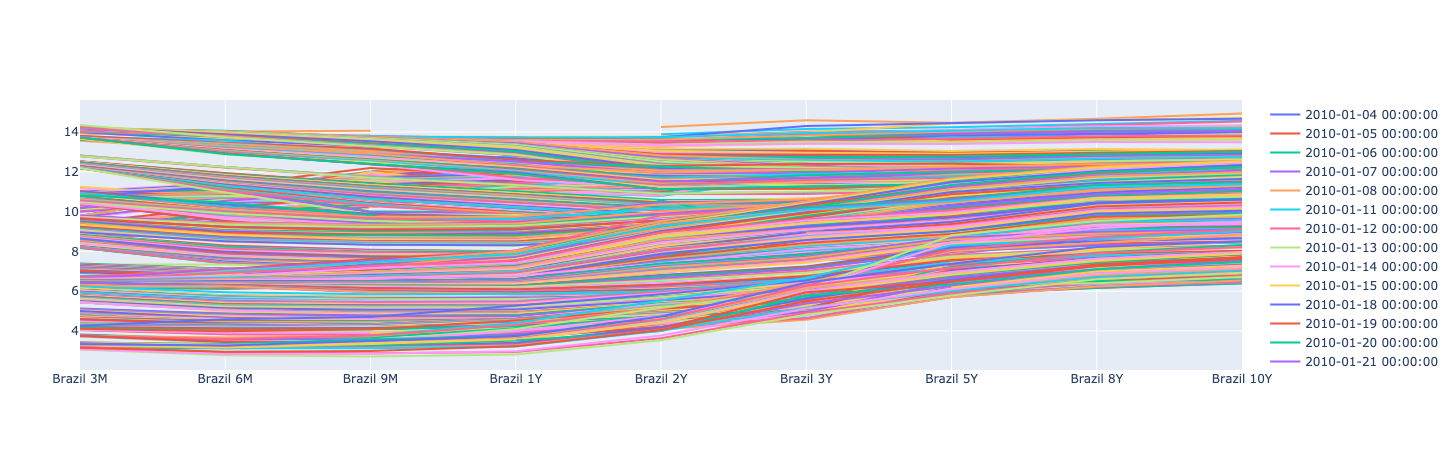

In [17]:
fig = go.Figure();

for i in bonds.index:
    fig.add_trace(go.Scatter(x=bondsBr, y=bonds.loc[i], mode='lines', name=str(i)))
    
fig.show()

## Curva de juros mensal ao longo do tempo

In [18]:
data_inicio = '01/01/2010'
data_fim = '28/04/2020'

bondsMensal = pd.DataFrame()

for prazo in bondsBr:
    bondsMensal[prazo] = inv.get_bond_historical_data(prazo, from_date=data_inicio, to_date=data_fim, interval='Monthly')['Close']


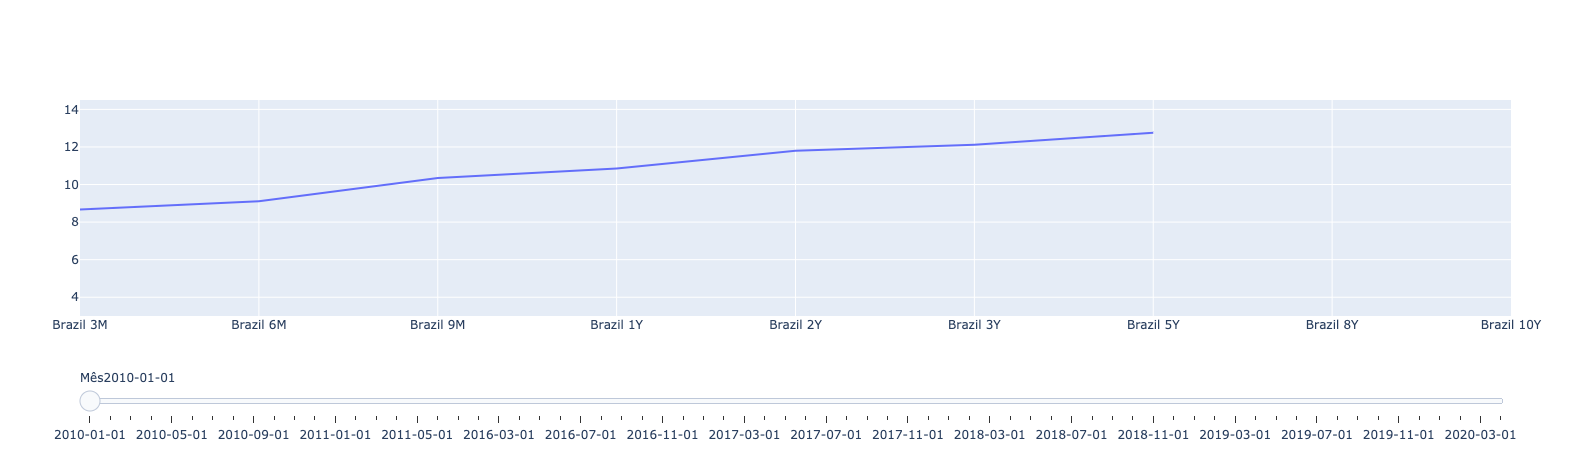

In [33]:

fig = go.Figure();

for i in bondsMensal.index:
    fig.add_trace(
        go.Scatter(
            x=bondsBr, 
            y=bondsMensal.loc[i], 
            mode='lines', 
            name=str(i),
            visible=False        
        ),
    )
    
fig.data[0].visible = True
    
steps = []

for i in range(len(fig.data)):
    step = dict(
        method='restyle',
        args=['visible', [False] * len(fig.data)],
        label=fig.data[i]['name']
    )
    
    step['args'][1][i] = True
    steps.append(step)
    
    
sliders = [
    dict(
        active=0,
        currentvalue={'prefix':"Mês"},
        pad={'t':50},
        steps=steps
    )
]


fig.update_layout(
    sliders = sliders,
    yaxis = dict(range=[3,14.5])
)
fig.show()

## SELIC vs Taxas do mercado

In [37]:
def get_data_from_bc(code):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(code)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df

In [46]:
selic = get_data_from_bc(432)
selic

valor
data             
1999-03-05   45.0
1999-03-06   45.0
1999-03-07   45.0
1999-03-08   45.0
1999-03-09   45.0
...           ...
2020-06-13    3.0
2020-06-14    3.0
2020-06-15    3.0
2020-06-16    3.0
2020-06-17    3.0

[7776 rows x 1 columns]

In [48]:
s2015 = selic[selic.index.year >= 2015]
b2015 = bonds[bonds.index.year >= 2015]

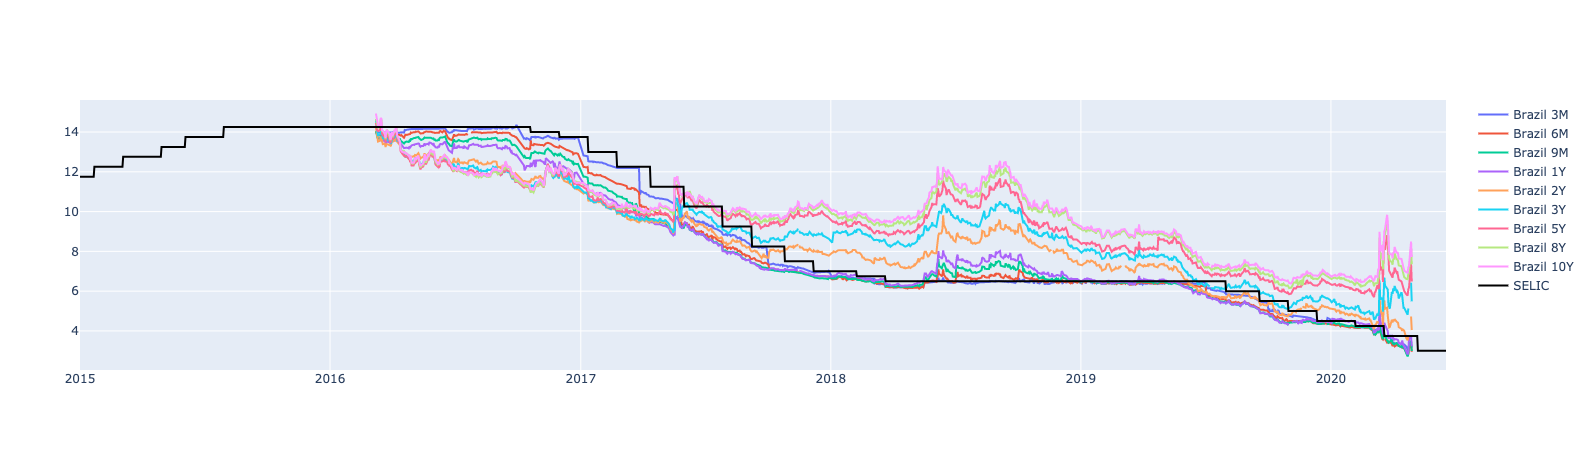

In [52]:
fig = go.Figure();

for i in bondsBr:
    fig.add_trace(go.Scatter(x=b2015.index, y=b2015[i], mode='lines', name=str(i)))
    
fig.add_trace(go.Scatter(x=s2015.index, y=s2015['valor'], mode='lines', name='SELIC', line={'color': "black"}))

fig.show()